In [47]:
# Decision trees can do  (P238)
# classification
# regression
# multioutput tasks

# still having limitations

In [48]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X = iris.data[:, 2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

In [49]:
tree_clf.predict([[4.92, 1.5]])

array([1])

In [50]:
tree_clf.predict_proba([[4.92, 1.5]])

array([[0., 1., 0.]])

In [51]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [52]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [53]:
# this can out a graph definition file called iris_tree.dot to check the trained model
import os
from sklearn.tree import export_graphviz

# 出力する.dotファイルのパスを指定
dot_file_path = os.path.join(os.getcwd(), "iris_tree.dot")

export_graphviz(tree_clf, out_file=dot_file_path,
                feature_names=iris.feature_names[:2],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

In [54]:
# transport this .dot file to png
# dot -Tpng iris_tree.dot -o iris_tree.png


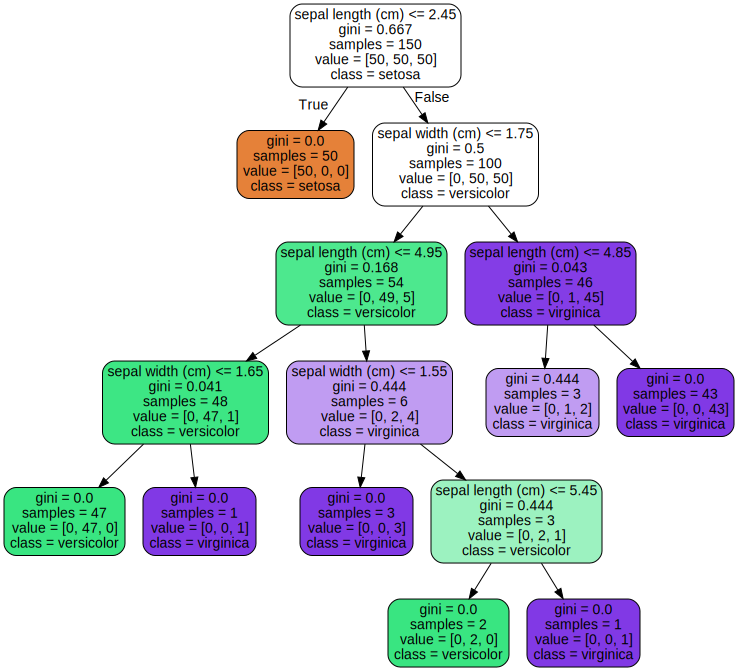

In [55]:
from graphviz import Source
Source.from_file(os.path.join(dot_file_path))

In [56]:
# to speed up training small data sets, use presort=True
# this slows down training for larger training setss !!! P244

In [57]:
# Gini Impurity is used by default but by setting criterion hyperparameter,
# entropy could be used


# In Machine Learning, entropy is frequently used as an impurity measure: a set’s
# entropy is zero when it contains instances of only one class !!!(P245)

# how to choose between them?_
# Gini is faster, but tends to isolate the most frequent class in its own branch of the tree
# entropy tends to produce more balanced trees

In [58]:
# Regularization hyperparameter
# 1. reduce  max_depth  reduces the risk of overfitting
# 2. min_samples_split (the minimum number of samples a node must have before splited)
#    min_samples_leaf (the minimum number of samples a leaf node must have)
#    min_weight_fraction_leaf (same as min_samples _leaf but expressed as a fraction)
#    max_leaf_nodes (the maximum number of leaf nodes)
#    max_features(the maximum number of features that are evaluated for splitting at each node)
#    increasing the min... and reducing the max.. can regularize the model

In [98]:
# Quadratic training set + noise
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1) # 200行1列の乱数
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

Text(0, 0.5, 'y')

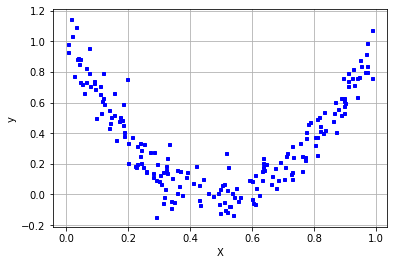

In [99]:
import matplotlib.pyplot as plt
plt.grid(True, which='both')
plt.plot(X, y, "bs",markersize=3 )
plt.xlabel("X")
plt.ylabel("y")

In [100]:
# Regression

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, min_samples_leaf=3)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=3)

In [101]:
dot_file_path_1 = os.path.join(os.getcwd(), "iris_tree_1.dot")

export_graphviz(tree_reg, out_file=dot_file_path_1,
                rounded=True,
                filled=True)

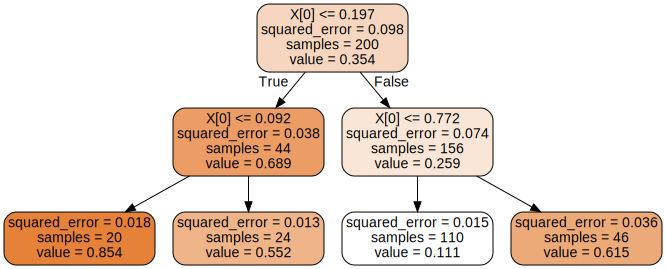

In [102]:
from graphviz import Source
Source.from_file(os.path.join(dot_file_path_1))

In [103]:
# to generate x1=0.6, traberse the tree starting at the root

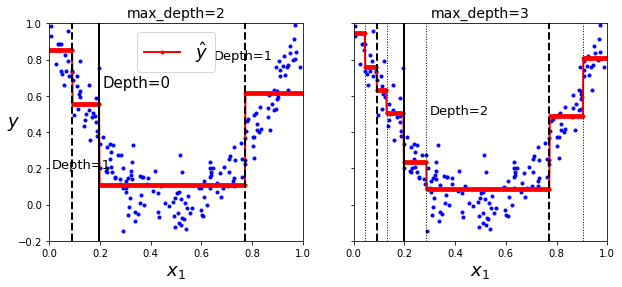

In [106]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

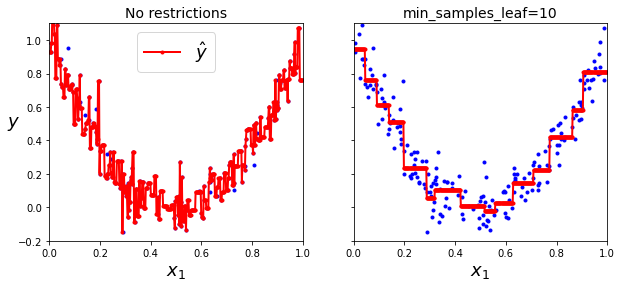

In [107]:
# CART algorithm of DecisionTreeRegressor tries to split the training set
# in a way that minimized the MSE
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

In [ ]:
# setting min_sample_leaf to 10 avoids the model to overfitting

In [ ]:
# The limitation of decision_tree
# 1. sensitive to training set rotation
#    solution: use Principal Component Analysis

# 2. very sensitive to small variations